# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [56]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [57]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 610


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [58]:
# Set the API base URL
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
   
    city_url = f"{url}appid={weather_api_key}&units={units}&q="
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | el calafate
Processing Record 2 of Set 1 | grand falls-windsor
Processing Record 3 of Set 1 | bubaque
Processing Record 4 of Set 1 | baruun-urt
Processing Record 5 of Set 1 | fortuna
Processing Record 6 of Set 1 | west island
Processing Record 7 of Set 1 | kone
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | constantia
Processing Record 10 of Set 1 | dudinka
Processing Record 11 of Set 1 | vorgashor
Processing Record 12 of Set 1 | iqaluit
Processing Record 13 of Set 1 | levuka
Processing Record 14 of Set 1 | walvis bay
Processing Record 15 of Set 1 | ilulissat
Processing Record 16 of Set 1 | ribeira grande
Processing Record 17 of Set 1 | isafjordur
Processing Record 18 of Set 1 | adamstown
Processing Record 19 of Set 1 | lihue
Processing Record 20 of Set 1 | port-aux-francais
Processing Record 21 of Set 1 | atafu village
Processing Record 22 of Set 1 | edinburgh of the seve

Processing Record 41 of Set 4 | presidente medici
Processing Record 42 of Set 4 | lesogorsk
Processing Record 43 of Set 4 | wailua homesteads
Processing Record 44 of Set 4 | fedorovskiy
Processing Record 45 of Set 4 | tateyama
Processing Record 46 of Set 4 | hithadhoo
Processing Record 47 of Set 4 | hays
Processing Record 48 of Set 4 | superior
Processing Record 49 of Set 4 | sidney
Processing Record 0 of Set 5 | badger
Processing Record 1 of Set 5 | yuzhno-kurilsk
Processing Record 2 of Set 5 | santa cruz
Processing Record 3 of Set 5 | tabora
Processing Record 4 of Set 5 | altai
Processing Record 5 of Set 5 | thompson
Processing Record 6 of Set 5 | klyuchi
Processing Record 7 of Set 5 | rabo de peixe
Processing Record 8 of Set 5 | safi
Processing Record 9 of Set 5 | margaret river
Processing Record 10 of Set 5 | aasiaat
Processing Record 11 of Set 5 | ocean city
Processing Record 12 of Set 5 | laikit, laikit ii (dimembe)
Processing Record 13 of Set 5 | vingt cinq
City not found. Skipp

Processing Record 35 of Set 8 | meizhou
Processing Record 36 of Set 8 | bani suwayf
Processing Record 37 of Set 8 | bonthe
Processing Record 38 of Set 8 | urangan
Processing Record 39 of Set 8 | inongo
Processing Record 40 of Set 8 | talagang
Processing Record 41 of Set 8 | nogliki
Processing Record 42 of Set 8 | igarka
Processing Record 43 of Set 8 | savanna-la-mar
Processing Record 44 of Set 8 | toga village
City not found. Skipping...
Processing Record 45 of Set 8 | lander
Processing Record 46 of Set 8 | yagry
City not found. Skipping...
Processing Record 47 of Set 8 | seogwipo
City not found. Skipping...
Processing Record 48 of Set 8 | al bawiti
Processing Record 49 of Set 8 | azare
Processing Record 0 of Set 9 | kolonia
Processing Record 1 of Set 9 | tralee
Processing Record 2 of Set 9 | vila velha
Processing Record 3 of Set 9 | loa janan
Processing Record 4 of Set 9 | singkil
Processing Record 5 of Set 9 | acarau
Processing Record 6 of Set 9 | sao paulo de olivenca
Processing Rec

Processing Record 21 of Set 12 | happy valley-goose bay
Processing Record 22 of Set 12 | westport
Processing Record 23 of Set 12 | concepcion
Processing Record 24 of Set 12 | hayma'
City not found. Skipping...
Processing Record 25 of Set 12 | meadow lakes
Processing Record 26 of Set 12 | roxas
Processing Record 27 of Set 12 | freetown
Processing Record 28 of Set 12 | najran
Processing Record 29 of Set 12 | vanimo
Processing Record 30 of Set 12 | sake
Processing Record 31 of Set 12 | nyagan
Processing Record 32 of Set 12 | sishilichengzi
City not found. Skipping...
Processing Record 33 of Set 12 | shingu
Processing Record 34 of Set 12 | yuxi
Processing Record 35 of Set 12 | batang
Processing Record 36 of Set 12 | saudarkrokur
Processing Record 37 of Set 12 | agaro
Processing Record 38 of Set 12 | sisimiut
Processing Record 39 of Set 12 | whitecourt
Processing Record 40 of Set 12 | sibut
Processing Record 41 of Set 12 | west bay
Processing Record 42 of Set 12 | fuvahmulah
City not found.

In [59]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)


# Show Record Count
city_data_df.count()

City          581
Lat           581
Lng           581
Max Temp      581
Humidity      581
Cloudiness    581
Wind Speed    581
Country       581
Date          581
dtype: int64

In [60]:
# Display sample data

city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,el calafate,-50.3408,-72.2768,5.33,77,3,2.87,AR,1696295705
1,grand falls-windsor,48.9332,-55.6649,10.28,74,23,1.91,CA,1696295705
2,bubaque,11.2833,-15.8333,28.05,81,99,2.78,GW,1696295705
3,baruun-urt,46.6806,113.2792,7.05,45,35,4.99,MN,1696295705
4,fortuna,40.5982,-124.1573,16.19,79,0,5.66,US,1696295559


In [61]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [62]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")


# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,el calafate,-50.3408,-72.2768,5.33,77,3,2.87,AR,1696295705
1,grand falls-windsor,48.9332,-55.6649,10.28,74,23,1.91,CA,1696295705
2,bubaque,11.2833,-15.8333,28.05,81,99,2.78,GW,1696295705
3,baruun-urt,46.6806,113.2792,7.05,45,35,4.99,MN,1696295705
4,fortuna,40.5982,-124.1573,16.19,79,0,5.66,US,1696295559


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

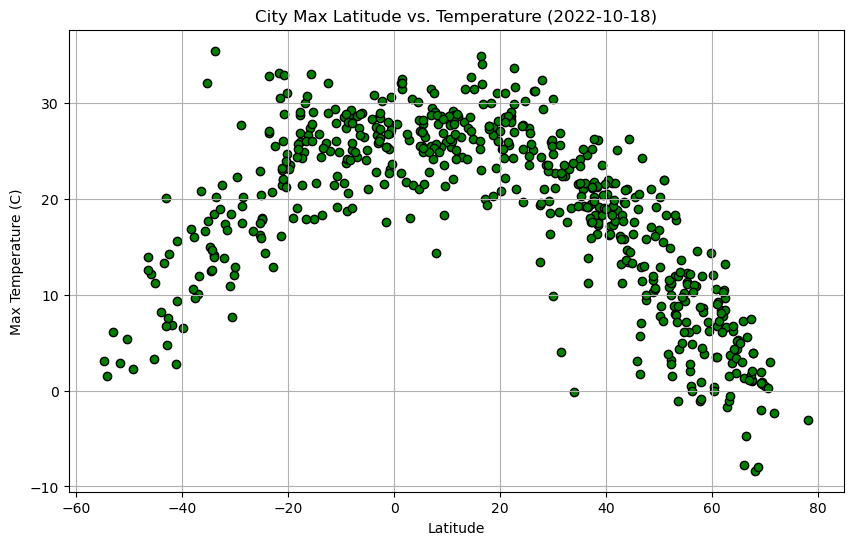

In [63]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(10, 6))
x_values = city_data_df['Lat']
y_values = city_data_df["Max Temp"]
plt.scatter(x_values, y_values, marker = 'o',facecolors='green', edgecolors='black')

# Incorporate the other graph properties

plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Max Latitude vs. Temperature (2022-10-18)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

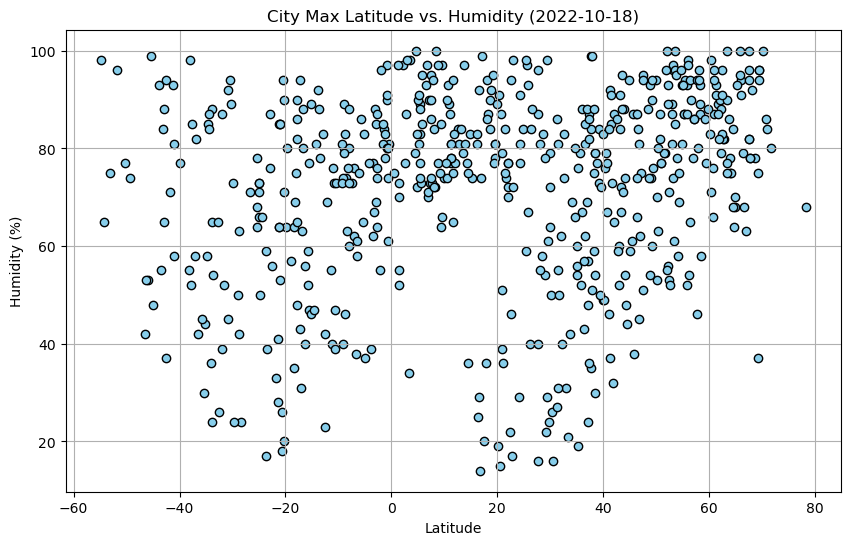

In [64]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(10, 6))
x_values = city_data_df['Lat']
y_values = city_data_df["Humidity"]
plt.scatter(x_values, y_values, marker = 'o',facecolors='skyblue', edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Max Latitude vs. Humidity (2022-10-18)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

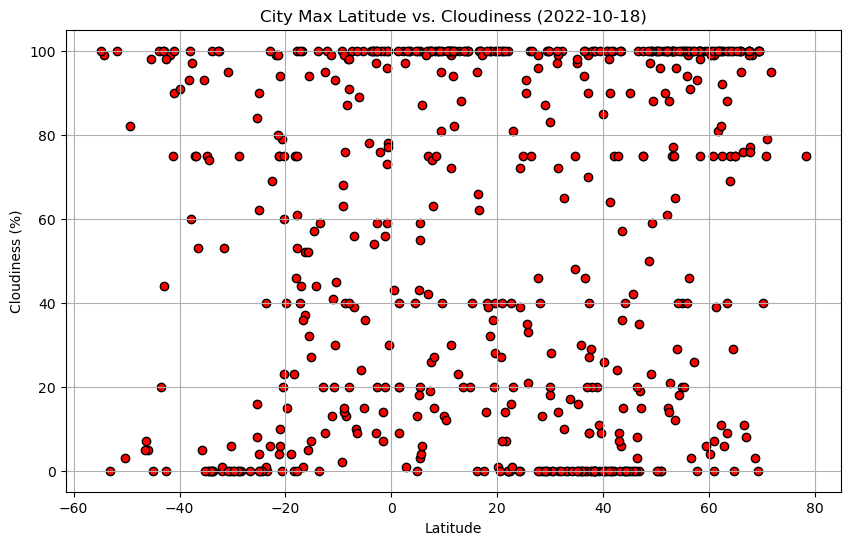

In [65]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(10, 6))
x_values = city_data_df['Lat']
y_values = city_data_df["Cloudiness"]
plt.scatter(x_values, y_values, marker = 'o',facecolors='red', edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Max Latitude vs. Cloudiness (2022-10-18)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

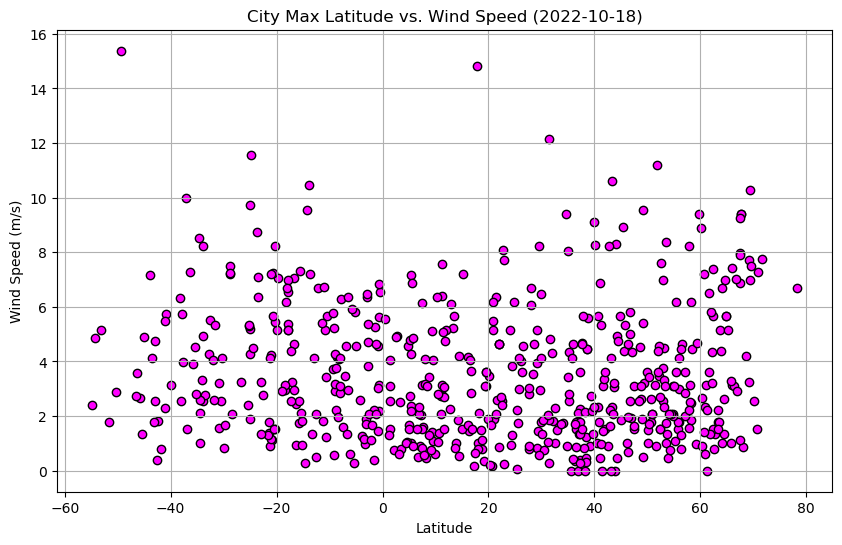

In [66]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(10, 6))
x_values = city_data_df['Lat']
y_values = city_data_df["Wind Speed"]
plt.scatter(x_values, y_values, marker = 'o',facecolors='magenta', edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Max Latitude vs. Wind Speed (2022-10-18)')
plt.grid(True)


# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [67]:
# Define a function to create Linear Regression plots
def create_linregress_plts (x_data, y_data, x_label, y_label, title):
        slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)
        plt.figure(figsize=(10, 6))
        regression_line = slope * np.array(x_data) + intercept
        plt.scatter(x_data, y_data, marker = 'o', facecolor='skyblue', edgecolor = 'black')
        plt.plot(x_data, regression_line, color='darkblue', linestyle='--')
        
        equation = f"y = {slope:.2f}x + {intercept:.2f}"
        plt.text(-5, 2, equation, fontsize=12, color='red', fontweight='bold')
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        plt.title(title)
        plt.grid(True)
        plt.show()
        print(f"The r value is : {r_value}")

In [68]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_data = city_data_df[city_data_df['Lat'] >= 0]
northern_hemi_df = pd.DataFrame(northern_hemi_data)
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,grand falls-windsor,48.9332,-55.6649,10.28,74,23,1.91,CA,1696295705
2,bubaque,11.2833,-15.8333,28.05,81,99,2.78,GW,1696295705
3,baruun-urt,46.6806,113.2792,7.05,45,35,4.99,MN,1696295705
4,fortuna,40.5982,-124.1573,16.19,79,0,5.66,US,1696295559
8,constantia,44.1833,28.6500,13.38,54,0,4.93,RO,1696295598


In [69]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_data = city_data_df[city_data_df['Lat'] < 0]
southern_hemi_df = pd.DataFrame(southern_hemi_data)

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,el calafate,-50.3408,-72.2768,5.33,77,3,2.87,AR,1696295705
5,west island,-12.1568,96.8225,24.99,69,100,6.69,CC,1696295570
6,kone,-21.0595,164.8658,25.99,53,94,4.25,NC,1696295579
7,waitangi,-43.9535,-176.5597,8.23,93,100,7.15,NZ,1696295557
13,walvis bay,-22.9575,14.5053,12.83,76,6,3.24,NaN,1696295572


###  Temperature vs. Latitude Linear Regression Plot

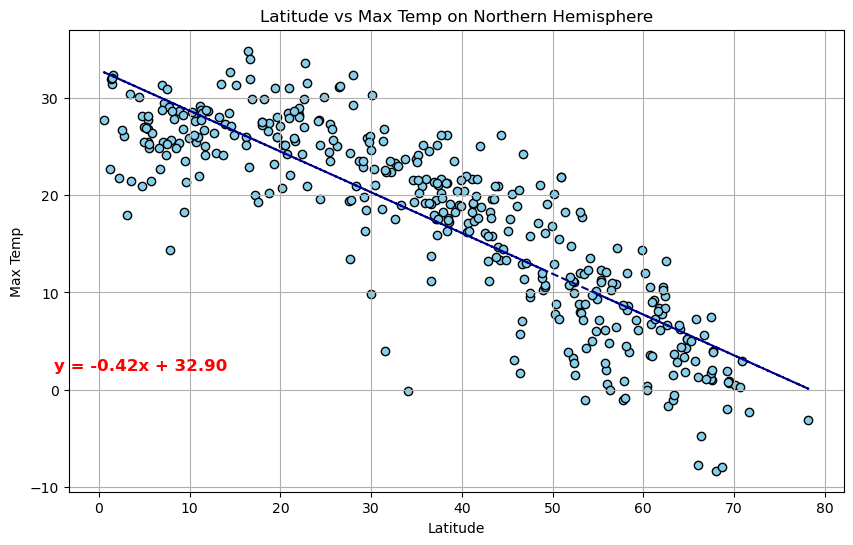

The r value is : -0.8589536327386926


In [70]:
# Linear regression on Northern Hemisphere
x_data = northern_hemi_df['Lat']
y_data = northern_hemi_df['Max Temp']
x_label = 'Latitude'
y_label = 'Max Temp'
title = 'Latitude vs Max Temp on Northern Hemisphere'


create_linregress_plts (x_data, y_data, x_label, y_label, title)

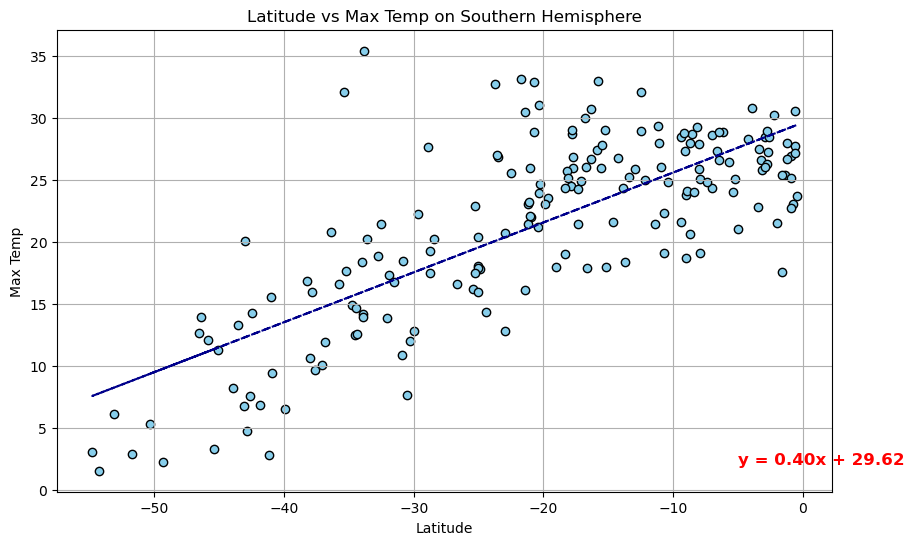

The r value is : 0.7599437276842176


In [71]:
# Linear regression on Southern Hemisphere
x_data = southern_hemi_df['Lat']
y_data = southern_hemi_df['Max Temp']
x_label = 'Latitude'
y_label = 'Max Temp'
title = 'Latitude vs Max Temp on Southern Hemisphere'


create_linregress_plts (x_data, y_data, x_label, y_label, title)

**Discussion about the linear relationship:** 
For Northern hemisphere: The linear relationship described by this equation is a proportional relationship between "x" and "y" with a negative slope (-0.43). This means that as "x" increases, "y" will decrease, and vice versa, and the relationship between the two variables is linear. The y-intercept of 33.67 indicates that when "x" is zero, "y" is 33.67, which is the point where the line intersects the y-axis.

For Southern Hemispher: The linear relationship described by this equation is a proportional relationship between "x" and "y" with a positive slope (0.40). This means that as "x" increases, "y" will increase, and vice versa, and the relationship between the two variables is linear. The y-intercept of 29.57 indicates that when "x" is zero, "y" is 29.57, which is the point where the line intersects the y-axis.

### Humidity vs. Latitude Linear Regression Plot

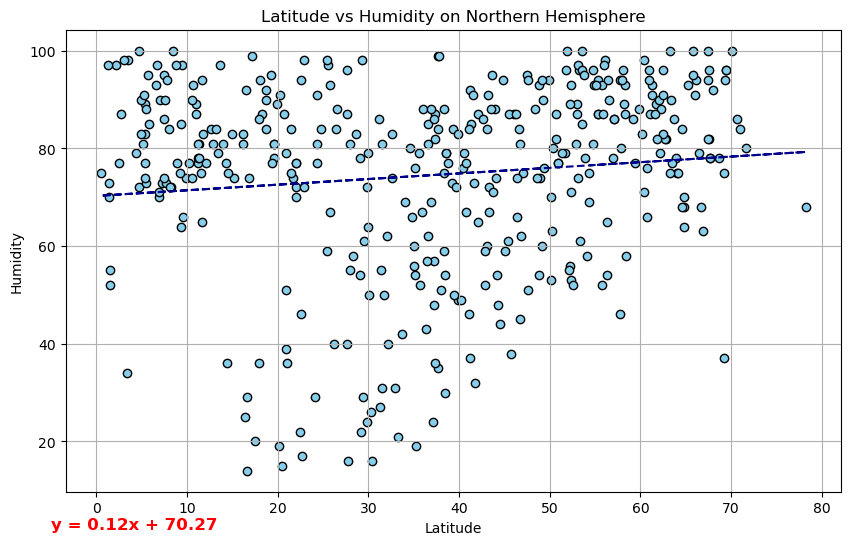

The r value is : 0.11518129379969563


In [72]:
# Northern Hemisphere
x_data = northern_hemi_df['Lat']
y_data = northern_hemi_df['Humidity']
x_label = 'Latitude'
y_label = 'Humidity'
title = 'Latitude vs Humidity on Northern Hemisphere'


create_linregress_plts (x_data, y_data, x_label, y_label, title)

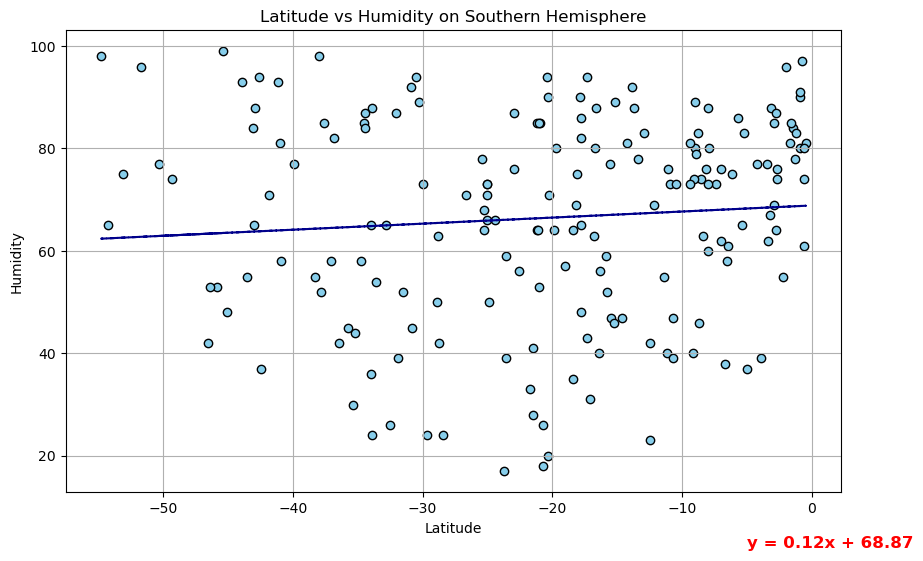

The r value is : 0.08321836431147174


In [73]:
# Southern Hemisphere
x_data = southern_hemi_df['Lat']
y_data = southern_hemi_df['Humidity']
x_label = 'Latitude'
y_label = 'Humidity'
title = 'Latitude vs Humidity on Southern Hemisphere'



create_linregress_plts (x_data, y_data, x_label, y_label, title)

**Discussion about the linear relationship:** 

For Northern hemisphere: The linear relationship described by this equation is a proportional relationship between "x" and "y" with a positive slope (0.10). This means that as "x" increases, "y" will increase, and vice versa, and the relationship between the two variables is linear. The y-intercept of 68.57 indicates that when "x" is zero, "y" is 68.57, which is the point where the line intersects the y-axis.

For Southern Hemispher: The linear relationship described by this equation is a proportional relationship between "x" and "y" with a positive slope (0.07). This means that as "x" increases, "y" will increase, and vice versa, and the relationship between the two variables is linear. The y-intercept of 70.14 indicates that when "x" is zero, "y" is 70.14, which is the point where the line intersects the y-axis.

### Cloudiness vs. Latitude Linear Regression Plot

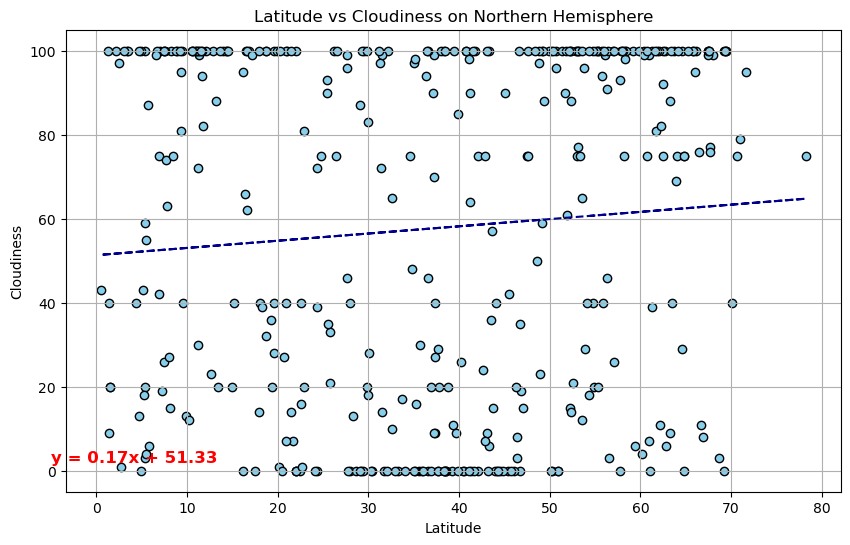

The r value is : 0.08281151826987089


In [74]:
# Northern Hemisphere
x_data = northern_hemi_df['Lat']
y_data = northern_hemi_df['Cloudiness']
x_label = 'Latitude'
y_label = 'Cloudiness'
title = 'Latitude vs Cloudiness on Northern Hemisphere'


create_linregress_plts (x_data, y_data, x_label, y_label, title)

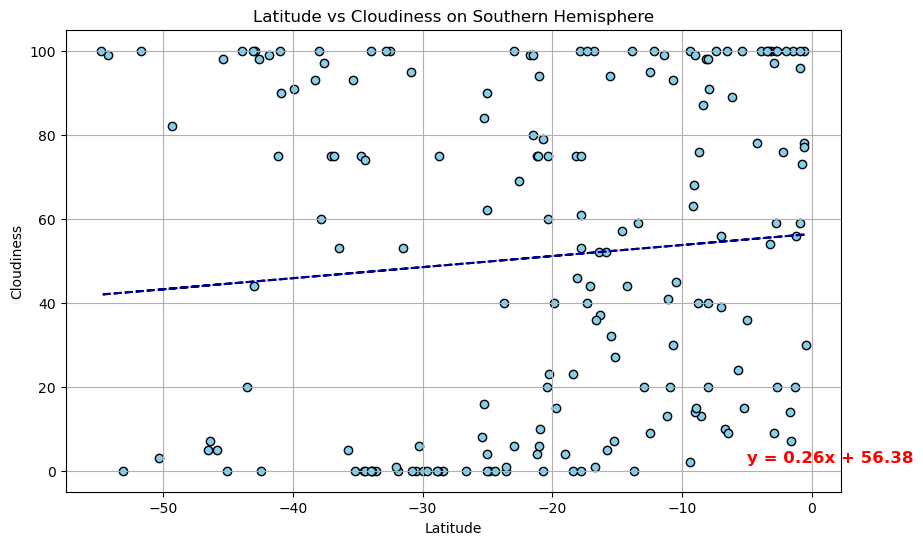

The r value is : 0.09463110197233304


In [75]:
# Southern Hemisphere
x_data = southern_hemi_df['Lat']
y_data = southern_hemi_df['Cloudiness']
x_label = 'Latitude'
y_label = 'Cloudiness'
title = 'Latitude vs Cloudiness on Southern Hemisphere'


create_linregress_plts (x_data, y_data, x_label, y_label, title)

**Discussion about the linear relationship:** 

For Northern hemisphere: The linear relationship described by this equation is a proportional relationship between "x" and "y" with a positive slope (0.18). This means that as "x" increases, "y" will increase, and vice versa, and the relationship between the two variables is linear. The y-intercept of 48.42 indicates that when "x" is zero, "y" is 48.42, which is the point where the line intersects the y-axis.

For Southern Hemispher: The linear relationship described by this equation is a proportional relationship between "x" and "y" with a positive slope (0.37). This means that as "x" increases, "y" will increase, and as "x" decreases, "y" will decrease. The slope of 0.37 indicates that for each unit increase in "x," "y" increases by 0.37 units, and vice versa. The y-intercept of 57.59 indicates that when "x" is zero, "y" is 57.59, which is the point where the line intersects the y-axis.

### Wind Speed vs. Latitude Linear Regression Plot

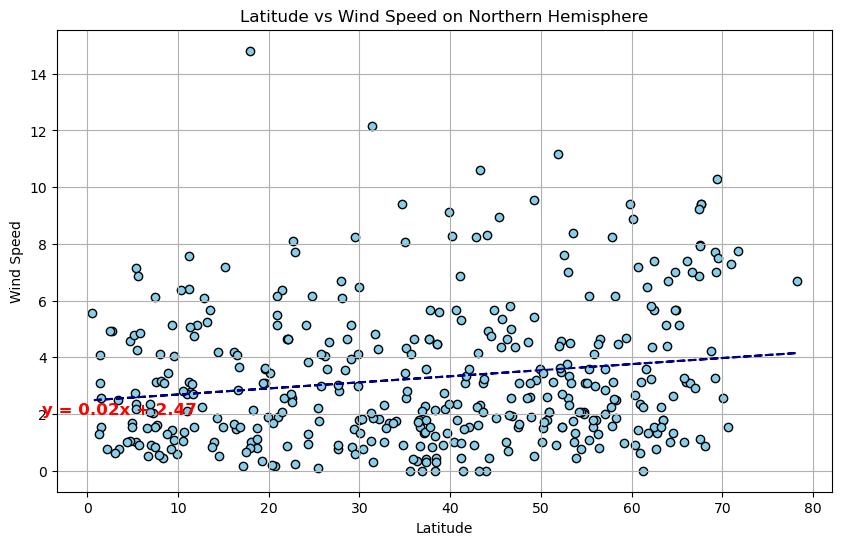

The r value is : 0.17333787201668605


In [76]:
# Northern Hemisphere
x_data = northern_hemi_df['Lat']
y_data = northern_hemi_df['Wind Speed']
x_label = 'Latitude'
y_label = 'Wind Speed'
title = 'Latitude vs Wind Speed on Northern Hemisphere'


create_linregress_plts (x_data, y_data, x_label, y_label, title)

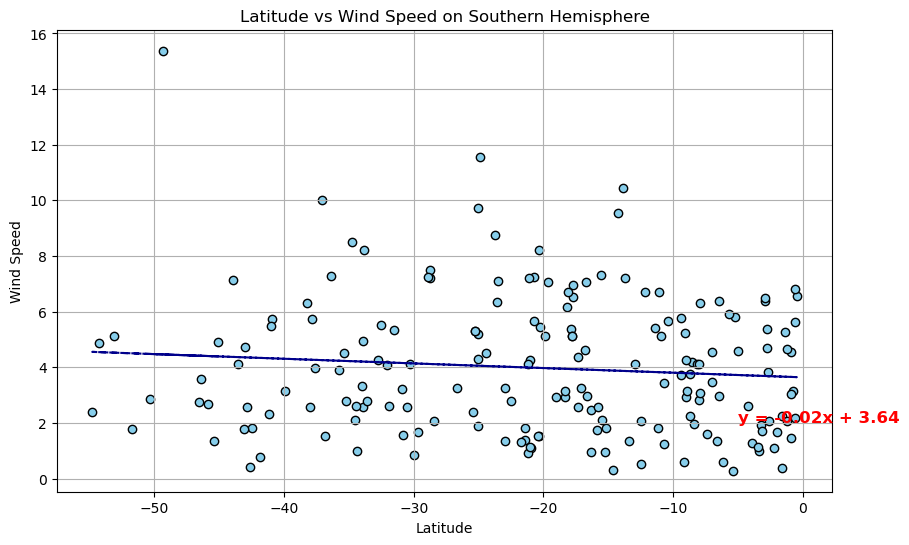

The r value is : -0.09559097573068419


In [77]:
# Southern Hemisphere
x_data = southern_hemi_df['Lat']
y_data = southern_hemi_df['Wind Speed']
x_label = 'Latitude'
y_label = 'Wind Speed'
title = 'Latitude vs Wind Speed on Southern Hemisphere'

create_linregress_plts (x_data, y_data, x_label, y_label, title)


**Discussion about the linear relationship:** 

For Northern hemisphere: The linear relationship described by this equation is a proportional relationship between "x" and "y" with a positive slope (0.01). This means that as "x" increases, "y" will increase, and as "x" decreases, "y" will decrease. The slope of 0.01 indicates that for each unit increase in "x," "y" increases by 0.01 units, and vice versa. The y-intercept of 3.30 indicates that when "x" is zero, "y" is 3.30, which is the point where the line intersects the y-axis.

For Southern Hemispher: The linear relationship described by this equation is a proportional relationship between "x" and "y" with a negative slope (-0.02). This means that as "x" increases, "y" will decrease, and as "x" decreases, "y" will increase. The negative slope of -0.02 indicates that for each unit increase in "x," "y" decreases by 0.02 units, and vice versa. The y-intercept of 3.59 indicates that when "x" is zero, "y" is 3.59, which is the point where the line intersects the y-axis.